<a href="https://colab.research.google.com/github/spingram/MAT421-sam/blob/main/SimpsonApproximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function my_simp_calc(f,a,b,n,option) , where the output I is the numerical integral of f , a function object, computed on a grid of n evenly spaced points starting at a and ending at b . The integration method used should be the simpson method. You may assume that n is odd.

In [54]:
def my_simp_calc(f,a,b,n,option):
      space = (b-a)/(n+1)
      points = [a + i * space for i in range(0,n+2)]
      evensum=0
      oddsum=0
      evenindex = round((n-1)/2)
      oddindex = evenindex +1
      for i in range(1,oddindex+1):
        oddsum = oddsum + 4*(f(points[2*i-1]))
      for i in range(1,evenindex+1):
        evensum = evensum+2*(f(points[2*i]))

      area = (space/3)*(f(points[0])+oddsum+evensum+f(points[n+1]))

      return area



In [58]:
f = lambda x: x**2

print("true value: 21.33")
simp_est = my_simp_calc(f,0,4,3,'left')
print("Simpson estimation: " + str(simp_est))

true value: 21.33
Simpson estimation: 21.333333333333332


Write a function my_fourier_coef(f,n)
, with output [An,Bn]
, where f
 is an function object that is 2π
-periodic. The function my_fourier_coef
 should compute the n
-th Fourier coefficients, An
 and Bn
, in the Fourier series for f
 defined by the two formulas given earlier. You should use the quad
 function to perform the integration.

In [13]:
import numpy as np
from scipy.integrate import trapz
def my_fourier_coef(f, n, num_points=1000):
    x = np.linspace(-np.pi, np.pi, num_points)
    g = lambda x: f(x) * np.cos(n * x)
    h = lambda x: f(x) * np.sin(n * x)
    An = (1 / np.pi) * trapz(g(x), x)
    Bn = (1 / np.pi) * trapz(h(x), x)
    return [An, Bn]

In [19]:
# Test code from book

import matplotlib.pyplot as plt
def plot_results(f, N):
    x = np.linspace(-np.pi, np.pi, 10000)
    [A0, B0] = my_fourier_coef(f, 0)
    y = A0*np.ones(len(x))/2
    for n in range(1, N):
        [An, Bn] = my_fourier_coef(f, n)
        y += An*np.cos(n*x)+Bn*np.sin(n*x)
    plt.figure(figsize = (10,6))
    plt.plot(x, f(x), label = 'analytic')
    plt.plot(x, y, label = 'approximate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    plt.title(f'{N}th Order Fourier Approximation')
    plt.show()



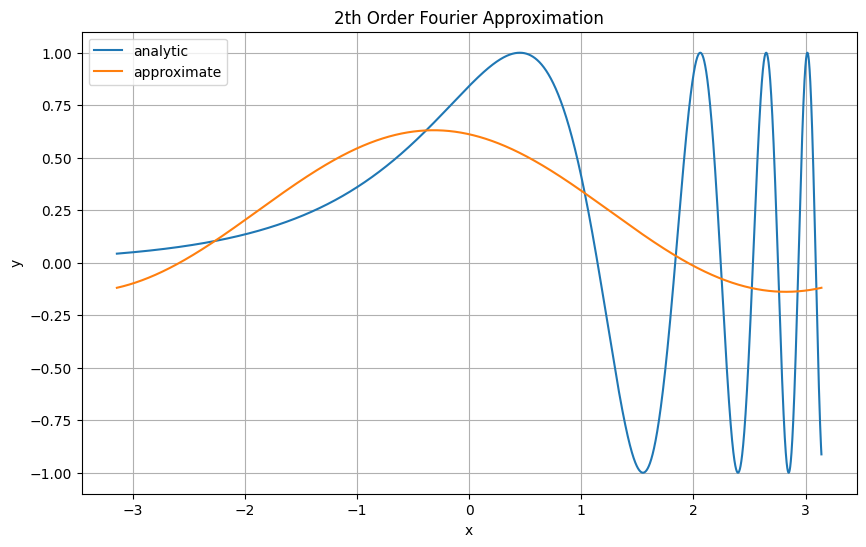

In [20]:

f = lambda x: np.sin(np.exp(x))
N = 2
my_fourier_coef(f, N)
plot_results(f,N)

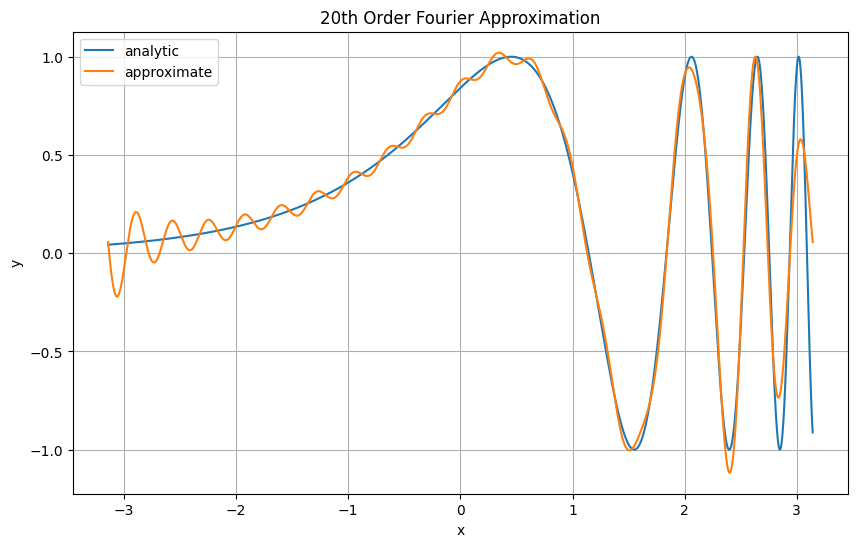

In [29]:

f = lambda x: np.sin(np.exp(x))
N = 20
my_fourier_coef(f, N)
plot_results(f,N)